For the sake of simplicity. You will take only two features such as mean distance driven per day and the mean percentage of time when a driver was more than 5 mph over the speed limit. Here are what the data respresent
* id : Unique ID of the driver
* mean_dist_day : mean distance driven by driver per day
* mean_over_speed_perc : mean percentage of time when a driver was more than 5 mph over the speed limit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
dataset = pd.read_csv('driver-data.csv')
dataset.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
dataset.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
dataset.info

<bound method DataFrame.info of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

In [6]:
dataset

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [8]:
dataset.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


<Axes: ylabel='mean_dist_day'>

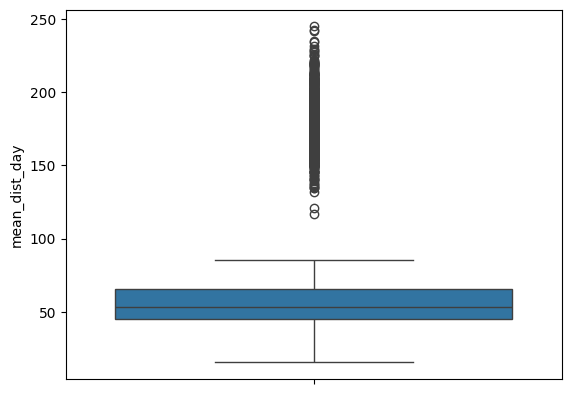

In [10]:
# finding outliers
sns.boxplot(dataset['mean_dist_day'])

<Axes: ylabel='mean_over_speed_perc'>

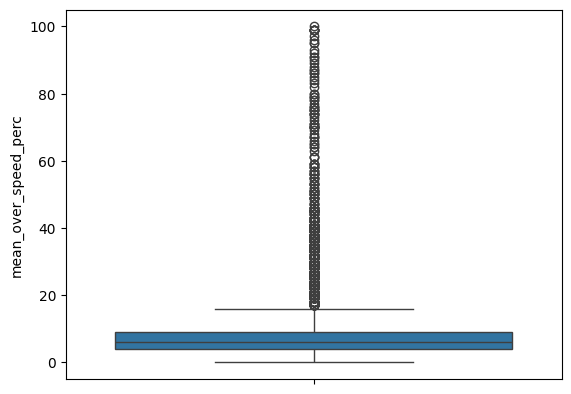

In [11]:
sns.boxplot(dataset['mean_over_speed_perc'])

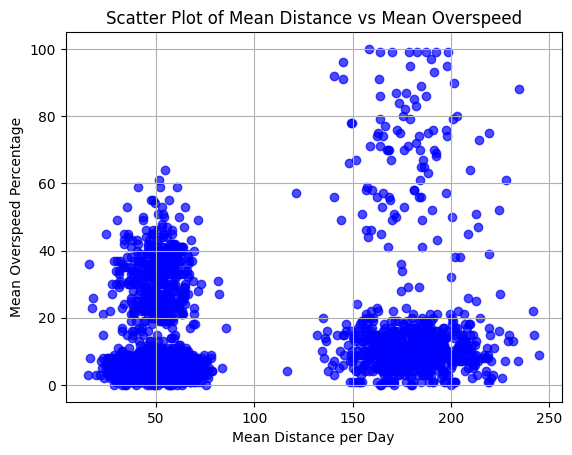

In [13]:
plt.scatter(dataset['mean_dist_day'], dataset['mean_over_speed_perc'], color='blue', alpha=0.7)
plt.xlabel('Mean Distance per Day')  # X-axis label
plt.ylabel('Mean Overspeed Percentage')  # Y-axis label
plt.title('Scatter Plot of Mean Distance vs Mean Overspeed')  # Chart title
plt.grid(True)  # Optional: Adds a grid to the chart
plt.show()

In [17]:
dataset.drop('id', axis=1, inplace=True)
 # (for deleting column wise data we are using axis=1), (and if i have to remove rows we use axis=0)

In [18]:
dataset.head(5)

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [21]:
# Optimal Number of Clusters
import warnings
warnings.filterwarnings('ignore') 
from sklearn.cluster import KMeans  

# WCSS: Within Cluster Sum of Squares
WCSS = []  # It is the sum of distances between each point and the centroid in a cluster

for i in range(1, 11):  # Loop through 1 to 10 clusters
    Kmean = KMeans(n_clusters=i, random_state=42)  
    Kmean.fit(dataset)  
    WCSS.append(Kmean.inertia_)  
    print(Kmean.inertia_)  


12184626.12962798
1316420.8509477193
1043390.759359722
719601.5383469037
557156.7708336512
372894.502351239
347181.37059338286
276961.4824710088
255412.2913719113
234699.40785635245


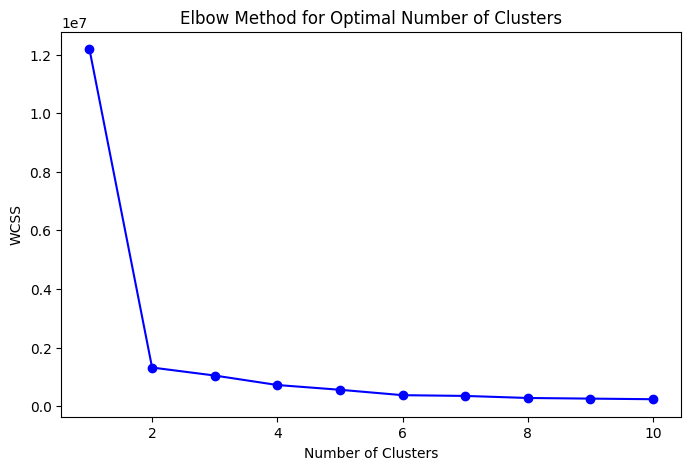

In [22]:
# Plot WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), WCSS, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [23]:
# optimal number of clusters = 2

In [25]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dataset) 


KMeans(n_clusters=2, random_state=42)

In [26]:
y_pred = kmeans.predict(dataset)
y_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(4000,), dtype=int32)

In [27]:
# centre of cluster
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [29]:
# count of 0 & 1 cluster
unique,count = np.unique(kmeans.labels_ , return_counts = True)
print(dict(zip(unique, count)))

{np.int32(0): np.int64(3200), np.int32(1): np.int64(800)}


In [34]:
from sklearn.cluster import KMeans

# Assuming 'mean_dist_day' and 'mean_over_speed_perc' are your features
features = dataset[['mean_dist_day', 'mean_over_speed_perc']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the dataset
dataset['clusters'] = kmeans.labels_


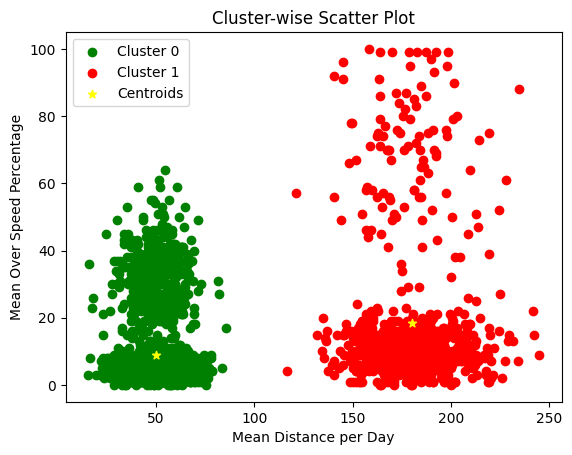

In [35]:
# To plot cluster-wise data
df1 = dataset[dataset['clusters'] == 0]  
df2 = dataset[dataset['clusters'] == 1]

# Scatter plot for cluster 0
plt.scatter(df1['mean_dist_day'], df1['mean_over_speed_perc'], color='green', label='Cluster 0')

# Scatter plot for cluster 1
plt.scatter(df2['mean_dist_day'], df2['mean_over_speed_perc'], color='red', label='Cluster 1')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', marker='*', label='Centroids')

# Adding labels and legend
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.title('Cluster-wise Scatter Plot')
plt.show()

